In [ ]:
#vector autoregression model on multivariate time series data for forecasting the future

In [1]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
data = sm.datasets.macrodata.load_pandas().data

# Display first few rows
print(data.head())

# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Check data types
print("\nData types:\n", data.dtypes)

# Summary statistics
print("\nSummary statistics:\n", data.describe())


     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  

Missing values:
 year        0
quarter     0
realgdp     0
realcons    0
realinv     0
realgovt    0
realdpi     0
cpi         0
m1          0
tbilrate    0
unemp       0
pop         0
infl        0
realint     0
dtype: int6

C:\Users\Dell\AppData\Local\Temp\ipykernel_3484\636912417.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data['date'] = pd.date_range(start='1959-01-01', periods=len(data), freq='Q')


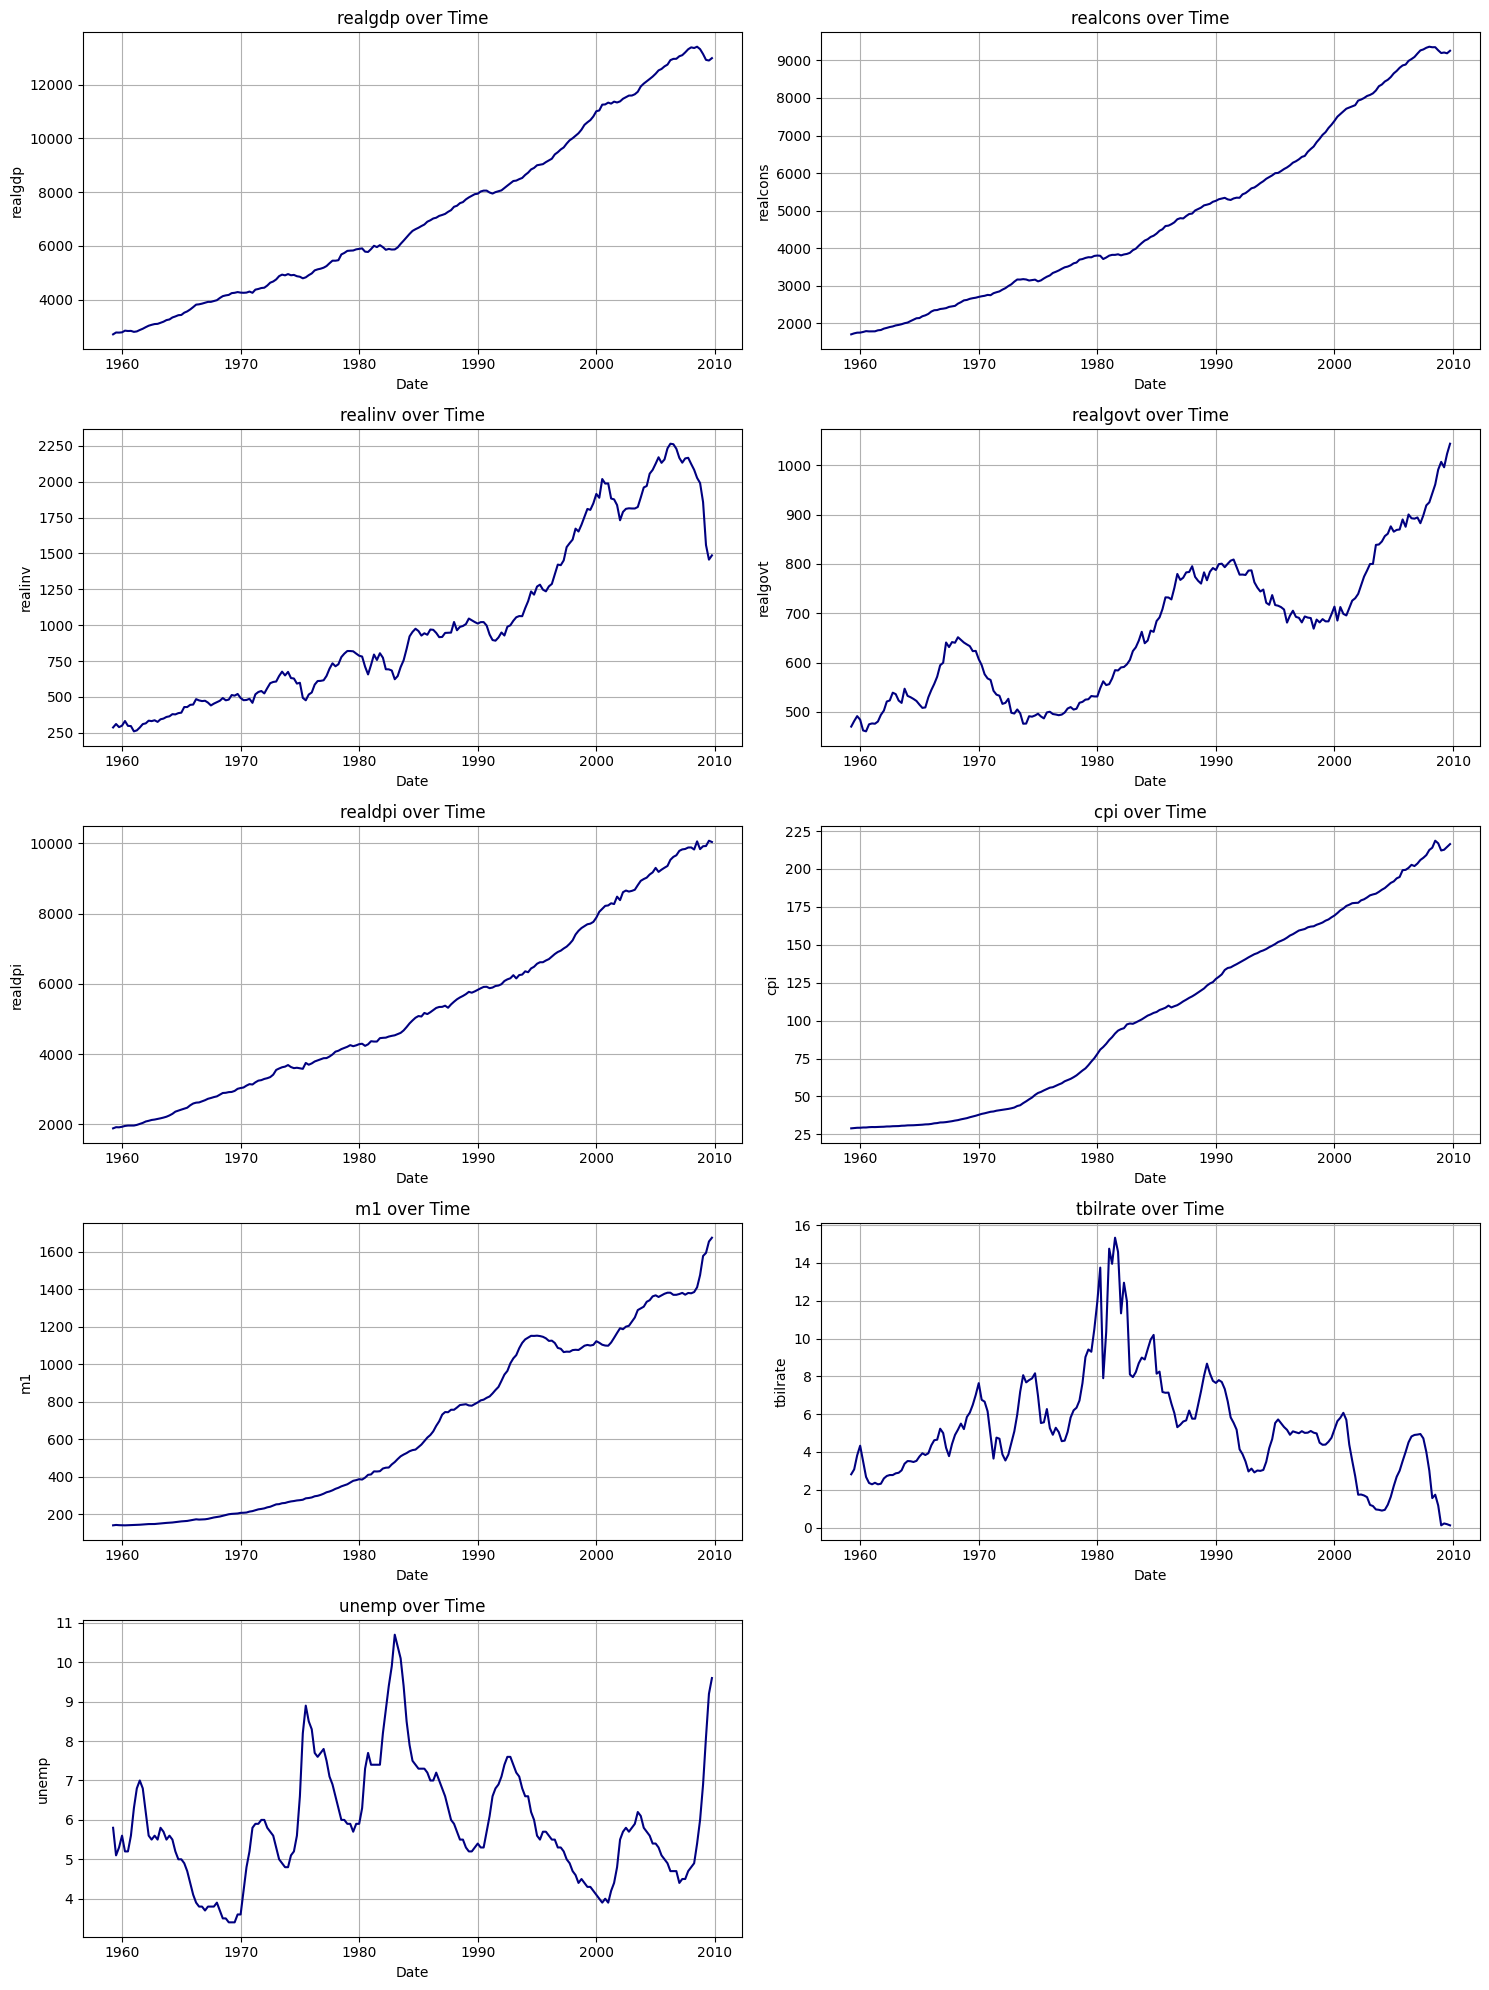

In [2]:
import matplotlib.pyplot as plt

# Create datetime index
data['date'] = pd.date_range(start='1959-01-01', periods=len(data), freq='Q')
data.set_index('date', inplace=True)

# Select variables to plot
variables_to_plot = ['realgdp', 'realcons', 'realinv', 'realgovt', 'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp']

# Plot each variable
plt.figure(figsize=(15, 20))
for i, var in enumerate(variables_to_plot):
    plt.subplot(5, 2, i+1)
    plt.plot(data.index, data[var], label=var, color='navy')
    plt.title(f'{var} over Time')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}:")
    print(f"  Test Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print(f"  Critical Values: {result[4]}")
    if result[1] > 0.05:
        print("  => Non-Stationary\n")
    else:
        print("  => Stationary\n")

# Run ADF test for each variable
for column in variables_to_plot:
    adf_test(data[column], column)


ADF Test for realgdp:
  Test Statistic: 1.7505
  p-value: 0.9982
  Critical Values: {'1%': np.float64(-3.4652439354133255), '5%': np.float64(-2.8768752281673717), '10%': np.float64(-2.574944653739612)}
  => Non-Stationary

ADF Test for realcons:
  Test Statistic: 1.5499
  p-value: 0.9977
  Critical Values: {'1%': np.float64(-3.4638151713286316), '5%': np.float64(-2.876250632135043), '10%': np.float64(-2.574611347821651)}
  => Non-Stationary

ADF Test for realinv:
  Test Statistic: -1.2573
  p-value: 0.6485
  Critical Values: {'1%': np.float64(-3.4636447617687436), '5%': np.float64(-2.8761761179270766), '10%': np.float64(-2.57457158581854)}
  => Non-Stationary

ADF Test for realgovt:
  Test Statistic: -0.0316
  p-value: 0.9558
  Critical Values: {'1%': np.float64(-3.4638151713286316), '5%': np.float64(-2.876250632135043), '10%': np.float64(-2.574611347821651)}
  => Non-Stationary

ADF Test for realdpi:
  Test Statistic: 2.9860
  p-value: 1.0000
  Critical Values: {'1%': np.float64(-3.46

In [4]:
# Apply first difference to all variables (except those already stationary if you noted them)
data_diff = data[variables_to_plot].diff().dropna()

# Re-run ADF test on differenced series
print("ADF Test After First Differencing:\n")
for column in data_diff.columns:
    adf_test(data_diff[column], column)


ADF Test After First Differencing:

ADF Test for realgdp:
  Test Statistic: -6.3057
  p-value: 0.0000
  Critical Values: {'1%': np.float64(-3.463476079125), '5%': np.float64(-2.876102355), '10%': np.float64(-2.574532225)}
  => Stationary

ADF Test for realcons:
  Test Statistic: -4.2043
  p-value: 0.0006
  Critical Values: {'1%': np.float64(-3.4638151713286316), '5%': np.float64(-2.876250632135043), '10%': np.float64(-2.574611347821651)}
  => Stationary

ADF Test for realinv:
  Test Statistic: -5.3506
  p-value: 0.0000
  Critical Values: {'1%': np.float64(-3.4636447617687436), '5%': np.float64(-2.8761761179270766), '10%': np.float64(-2.57457158581854)}
  => Stationary

ADF Test for realgovt:
  Test Statistic: -3.9708
  p-value: 0.0016
  Critical Values: {'1%': np.float64(-3.4638151713286316), '5%': np.float64(-2.876250632135043), '10%': np.float64(-2.574611347821651)}
  => Stationary

ADF Test for realdpi:
  Test Statistic: -8.8649
  p-value: 0.0000
  Critical Values: {'1%': np.float64

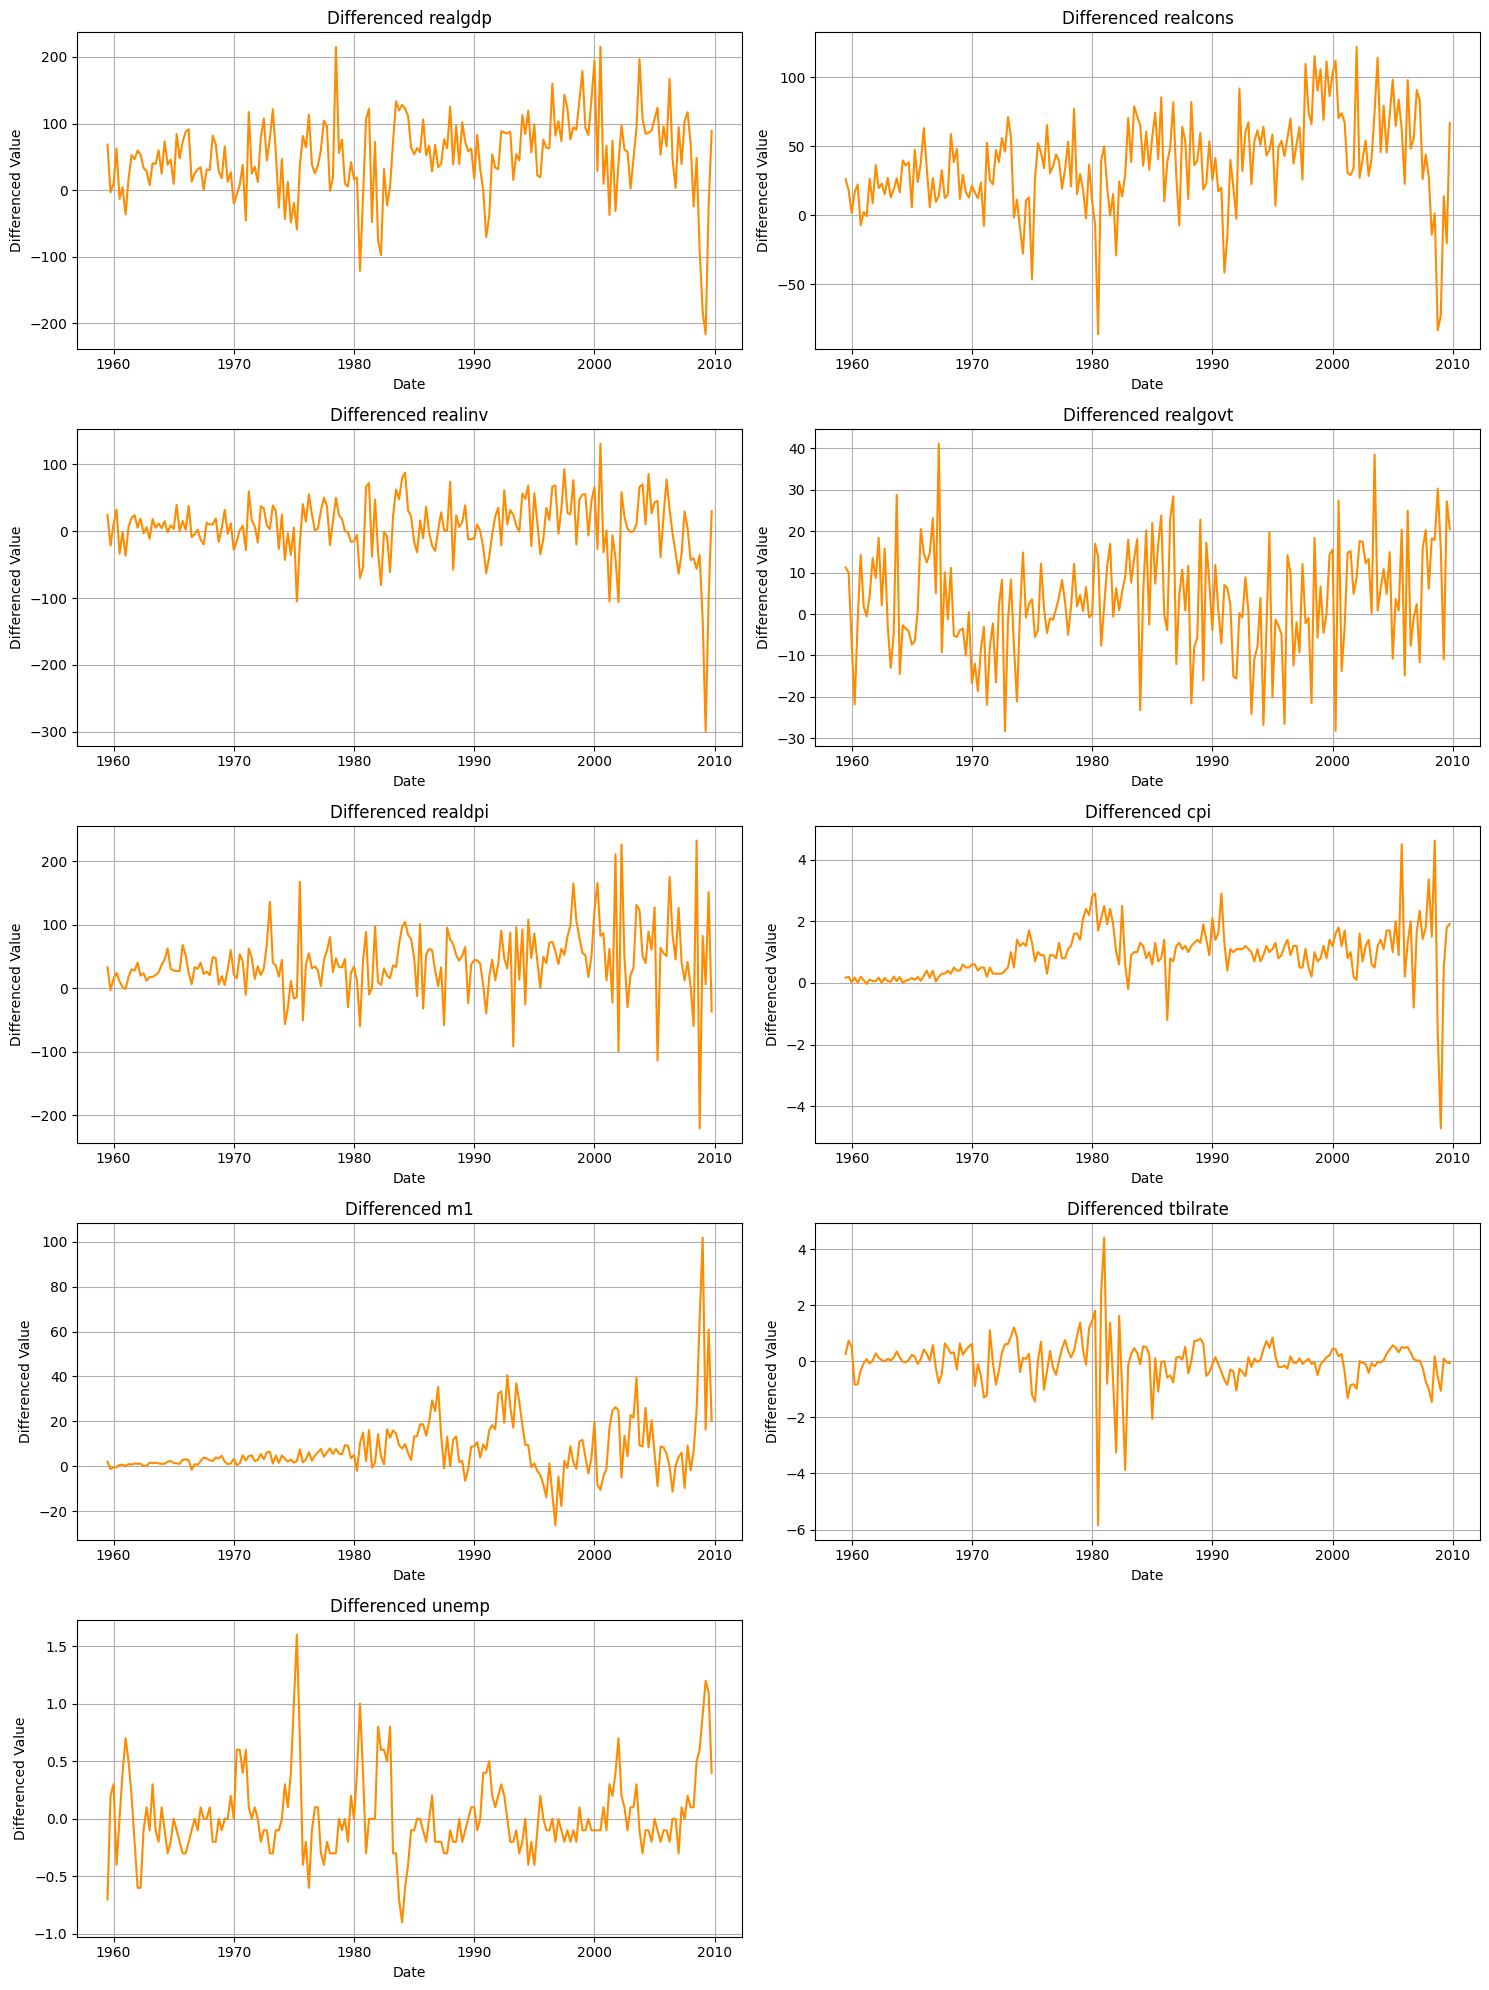

In [5]:
# Plot the differenced variables
plt.figure(figsize=(15, 20))
for i, var in enumerate(data_diff.columns):
    plt.subplot(5, 2, i+1)
    plt.plot(data_diff.index, data_diff[var], label=var + ' (Diff)', color='darkorange')
    plt.title(f'Differenced {var}')
    plt.xlabel('Date')
    plt.ylabel('Differenced Value')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
from statsmodels.tsa.api import VAR

# Fit VAR model to the differenced data
model = VAR(data_diff)

# Select optimal lag using AIC and BIC
lag_selection = model.select_order(maxlags=15)
print(lag_selection.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        35.17       35.33   1.879e+15       35.23
1        33.32      34.88*   2.962e+14      33.95*
2        33.36       36.32   3.107e+14       34.56
3        33.17       37.53   2.601e+14       34.94
4        33.15       38.90   2.614e+14       35.48
5        32.94       40.10  2.227e+14*       35.84
6        32.99       41.55   2.504e+14       36.46
7        33.04       42.99   2.888e+14       37.07
8        32.71       44.06   2.381e+14       37.31
9        32.60       45.35   2.562e+14       37.77
10       32.61       46.76   3.255e+14       38.34
11       32.45       48.00   3.779e+14       38.75
12       32.33       49.28   4.984e+14       39.20
13       31.91       50.26   5.437e+14       39.35
14       31.68       51.43   8.260e+14       39.68
15      30.90*       52.05   8.858e+14       39.47
-------------------------------

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [7]:
# Define size of test set (e.g., last 10 observations for testing)
n_obs = 10
train_data = data_diff[:-n_obs]
test_data = data_diff[-n_obs:]


In [8]:
# Fit the model
model_fitted = model.fit(lag_selection.aic)  # Or replace with your chosen lag number
print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Apr, 2025
Time:                     15:56:51
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    52.0451
Nobs:                     187.000    HQIC:                   39.4656
Log likelihood:          -4052.85    FPE:                8.85825e+14
AIC:                      30.8960    Det(Omega_mle):     6.47291e+12
--------------------------------------------------------------------
Results for equation realgdp
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               32.358255        23.428008            1.381           0.167
L1.realgdp          -0.190951         0.335569           -0.569           0.569
L1.realcons          1.123983         0.427474            2.62

In [9]:
# Forecast next `n_obs` observations
forecast = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=n_obs)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)


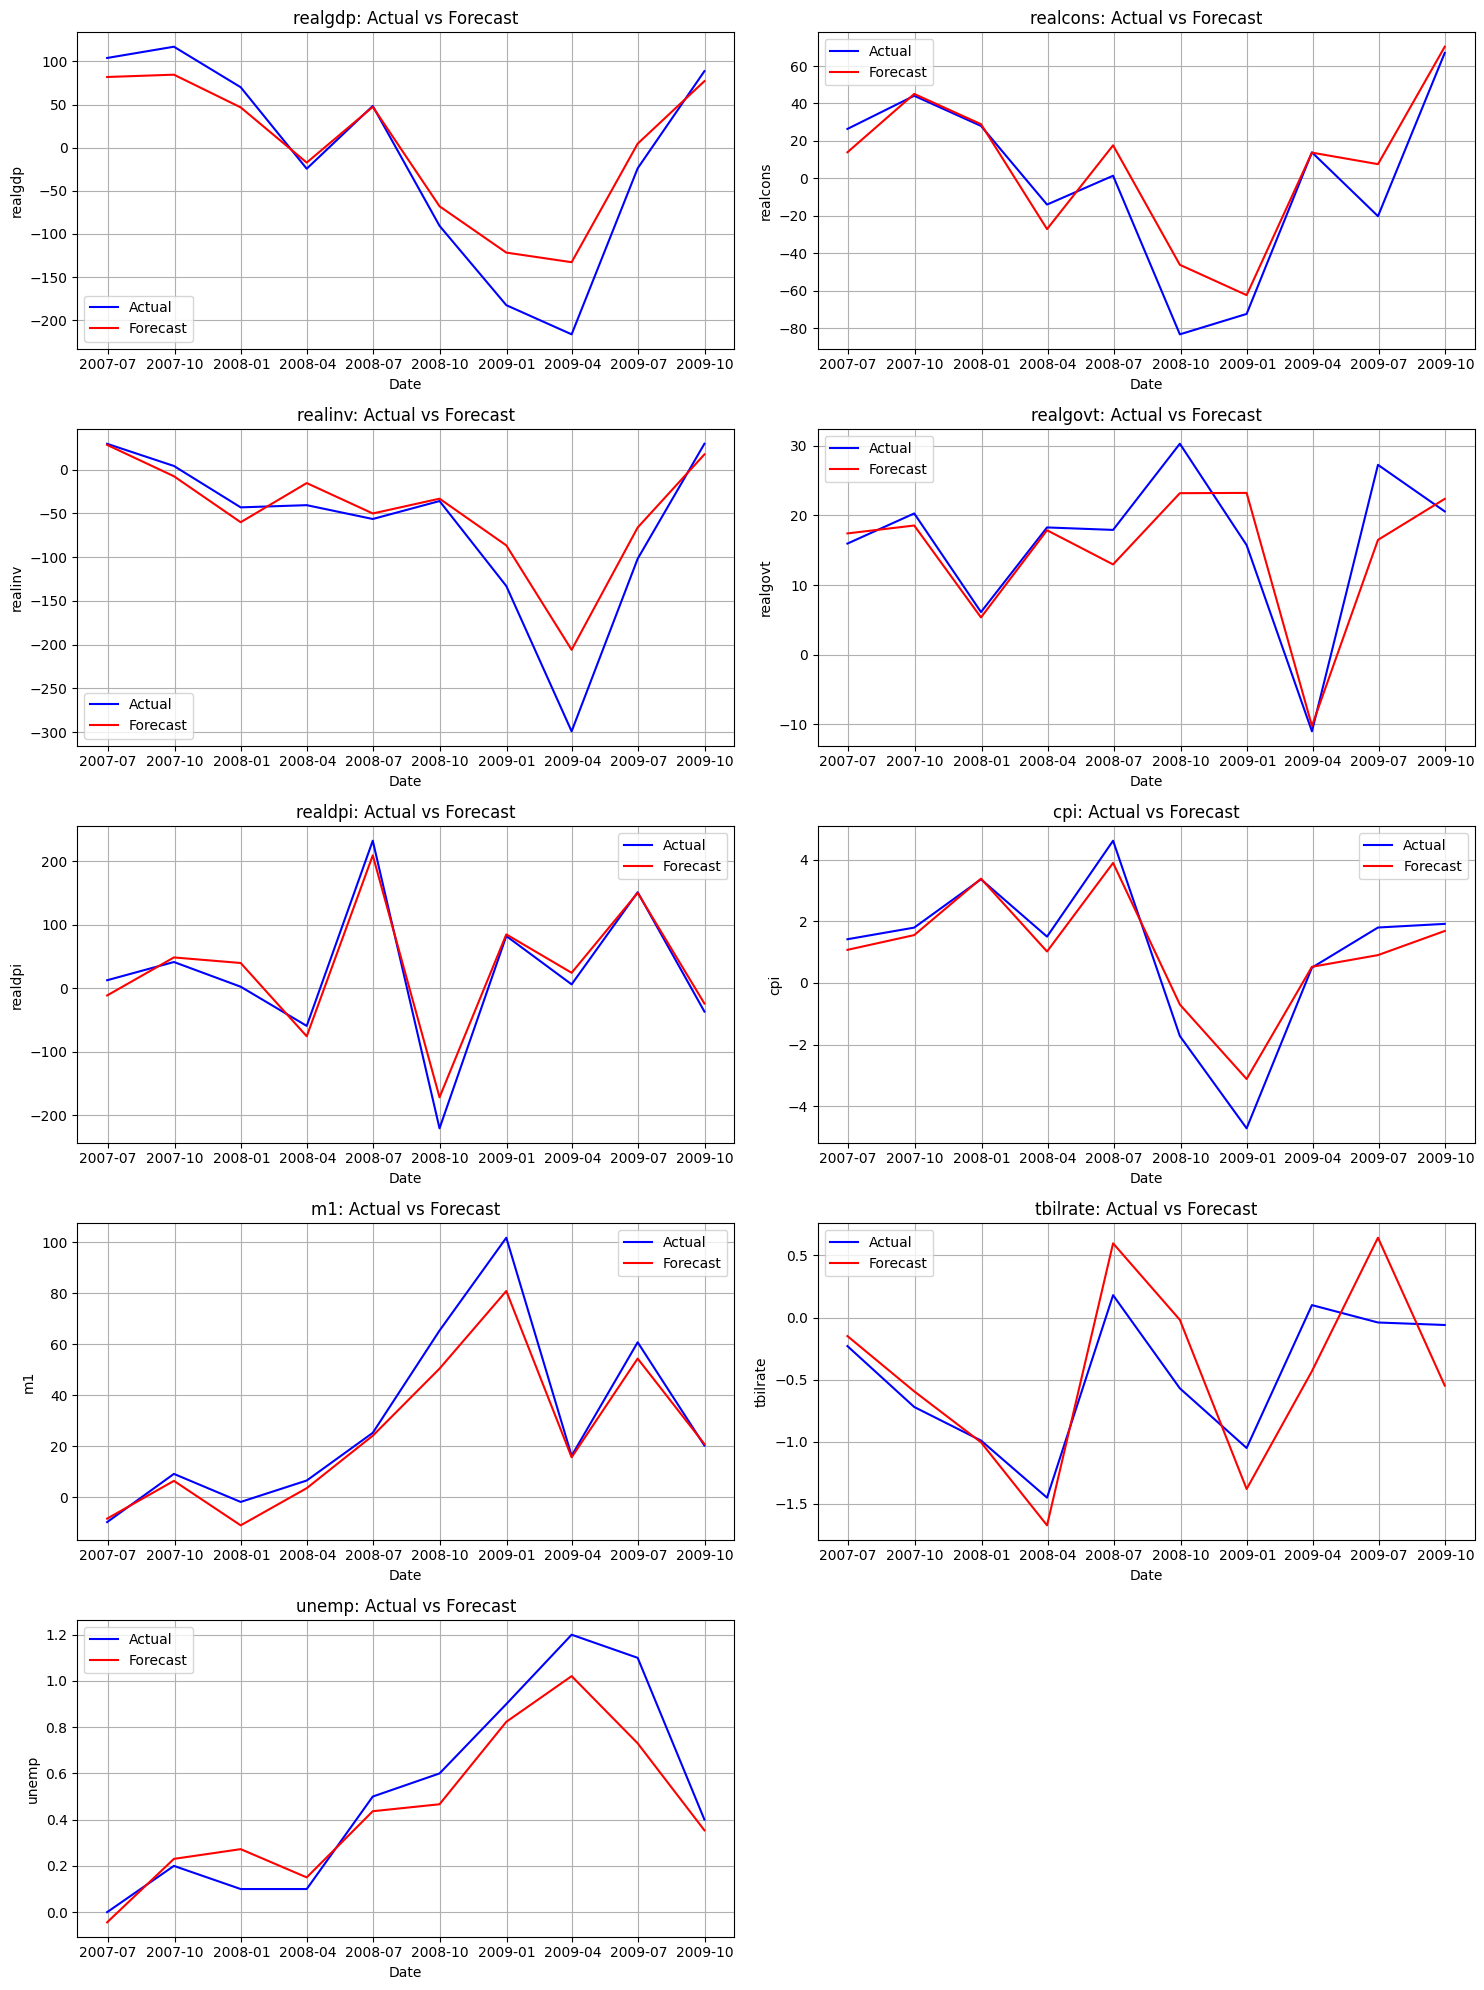

In [10]:
# Plot forecast vs actual for each variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(test_data.columns):
    plt.subplot(5, 2, i+1)
    plt.plot(test_data.index, test_data[col], label='Actual', color='blue')
    plt.plot(forecast_df.index, forecast_df[col], label='Forecast', color='red')
    plt.title(f'{col}: Actual vs Forecast')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for col in test_data.columns:
    actual = test_data[col].values
    predicted = forecast_df[col].values

    mae = mean_absolute_error(actual, predicted)
    rmse = mean_squared_error(actual, predicted) ** 0.5
    mape = mean_absolute_percentage_error(actual, predicted)

    print(f"\n{col}:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAPE: {mape:.2f}%")




realgdp:
  MAE:  29.3611
  RMSE: 37.8497
  MAPE: 34.32%

realcons:
  MAE:  12.2139
  RMSE: 16.8954
  MAPE: 150.82%

realinv:
  MAE:  25.1887
  RMSE: 36.5913
  MAPE: 54.15%

realgovt:
  MAE:  3.7249
  RMSE: 5.0661
  MAPE: 18.66%

realdpi:
  MAE:  19.1275
  RMSE: 23.8926
  MAPE: 223.50%

cpi:
  MAE:  0.5585
  RMSE: 0.7340
  MAPE: 24.67%

m1:
  MAE:  6.0788
  RMSE: 8.9702
  MAPE: 66.34%

tbilrate:
  MAE:  0.3444
  RMSE: 0.4057
  MAPE: 348.03%

unemp:
  MAE:  0.1166
  RMSE: 0.1529
  MAPE: inf%


C:\Users\Dell\AppData\Local\Temp\ipykernel_3484\2255095014.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [14]:
from statsmodels.tsa.stattools import grangercausalitytests

# Max lag (use the same as chosen for VAR)
max_lag = model_fitted.k_ar

# Perform Granger Causality Test for all variable pairs
variables = data_diff.columns
causality_results = {}

print("\nGranger Causality Test Results:")
for caused in variables:
    for causing in variables:
        if caused != causing:
            print(f'\n⏩ Testing if {causing} Granger-causes {caused}')
            result = grangercausalitytests(data_diff[[caused, causing]], maxlag=max_lag, verbose=False)
            p_values = [round(result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lag)]
            min_p = min(p_values)
            causality_results[(causing, caused)] = min_p
            print(f"  Min P-value across lags: {min_p}")



Granger Causality Test Results:

⏩ Testing if realcons Granger-causes realgdp
  Min P-value across lags: 0.0

⏩ Testing if realinv Granger-causes realgdp
  Min P-value across lags: 0.0412

⏩ Testing if realgovt Granger-causes realgdp
  Min P-value across lags: 0.0166

⏩ Testing if realdpi Granger-causes realgdp
  Min P-value across lags: 0.0092

⏩ Testing if cpi Granger-causes realgdp


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.0005

⏩ Testing if m1 Granger-causes realgdp
  Min P-value across lags: 0.0145

⏩ Testing if tbilrate Granger-causes realgdp
  Min P-value across lags: 0.0008

⏩ Testing if unemp Granger-causes realgdp
  Min P-value across lags: 0.0125

⏩ Testing if realgdp Granger-causes realcons
  Min P-value across lags: 0.0021

⏩ Testing if realinv Granger-causes realcons
  Min P-value across lags: 0.0018

⏩ Testing if realgovt Granger-causes realcons
  Min P-value across lags: 0.049

⏩ Testing if realdpi Granger-causes realcons


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.0035

⏩ Testing if cpi Granger-causes realcons
  Min P-value across lags: 0.0

⏩ Testing if m1 Granger-causes realcons
  Min P-value across lags: 0.0153

⏩ Testing if tbilrate Granger-causes realcons
  Min P-value across lags: 0.0006

⏩ Testing if unemp Granger-causes realcons
  Min P-value across lags: 0.0223

⏩ Testing if realgdp Granger-causes realinv
  Min P-value across lags: 0.0

⏩ Testing if realcons Granger-causes realinv
  Min P-value across lags: 0.0

⏩ Testing if realgovt Granger-causes realinv
  Min P-value across lags: 0.0219

⏩ Testing if realdpi Granger-causes realinv


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.0065

⏩ Testing if cpi Granger-causes realinv
  Min P-value across lags: 0.0

⏩ Testing if m1 Granger-causes realinv
  Min P-value across lags: 0.0004

⏩ Testing if tbilrate Granger-causes realinv
  Min P-value across lags: 0.0

⏩ Testing if unemp Granger-causes realinv
  Min P-value across lags: 0.0

⏩ Testing if realgdp Granger-causes realgovt
  Min P-value across lags: 0.0615

⏩ Testing if realcons Granger-causes realgovt


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.1593

⏩ Testing if realinv Granger-causes realgovt
  Min P-value across lags: 0.0217

⏩ Testing if realdpi Granger-causes realgovt
  Min P-value across lags: 0.0

⏩ Testing if cpi Granger-causes realgovt
  Min P-value across lags: 0.0144

⏩ Testing if m1 Granger-causes realgovt
  Min P-value across lags: 0.5142

⏩ Testing if tbilrate Granger-causes realgovt


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.5864

⏩ Testing if unemp Granger-causes realgovt
  Min P-value across lags: 0.4162

⏩ Testing if realgdp Granger-causes realdpi
  Min P-value across lags: 0.0012

⏩ Testing if realcons Granger-causes realdpi
  Min P-value across lags: 0.0

⏩ Testing if realinv Granger-causes realdpi
  Min P-value across lags: 0.021

⏩ Testing if realgovt Granger-causes realdpi
  Min P-value across lags: 0.462

⏩ Testing if cpi Granger-causes realdpi
  Min P-value across lags: 0.0001

⏩ Testing if m1 Granger-causes realdpi


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.1627

⏩ Testing if tbilrate Granger-causes realdpi
  Min P-value across lags: 0.032

⏩ Testing if unemp Granger-causes realdpi
  Min P-value across lags: 0.0164

⏩ Testing if realgdp Granger-causes cpi
  Min P-value across lags: 0.0641

⏩ Testing if realcons Granger-causes cpi
  Min P-value across lags: 0.0001

⏩ Testing if realinv Granger-causes cpi
  Min P-value across lags: 0.0036

⏩ Testing if realgovt Granger-causes cpi
  Min P-value across lags: 0.01

⏩ Testing if realdpi Granger-causes cpi


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.0002

⏩ Testing if m1 Granger-causes cpi
  Min P-value across lags: 0.0

⏩ Testing if tbilrate Granger-causes cpi
  Min P-value across lags: 0.0005

⏩ Testing if unemp Granger-causes cpi
  Min P-value across lags: 0.0094

⏩ Testing if realgdp Granger-causes m1
  Min P-value across lags: 0.013

⏩ Testing if realcons Granger-causes m1
  Min P-value across lags: 0.0037

⏩ Testing if realinv Granger-causes m1
  Min P-value across lags: 0.0273

⏩ Testing if realgovt Granger-causes m1


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.127

⏩ Testing if realdpi Granger-causes m1
  Min P-value across lags: 0.0022

⏩ Testing if cpi Granger-causes m1
  Min P-value across lags: 0.0

⏩ Testing if tbilrate Granger-causes m1
  Min P-value across lags: 0.0005

⏩ Testing if unemp Granger-causes m1
  Min P-value across lags: 0.1074

⏩ Testing if realgdp Granger-causes tbilrate
  Min P-value across lags: 0.0001

⏩ Testing if realcons Granger-causes tbilrate
  Min P-value across lags: 0.1008

⏩ Testing if realinv Granger-causes tbilrate


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.0196

⏩ Testing if realgovt Granger-causes tbilrate
  Min P-value across lags: 0.506

⏩ Testing if realdpi Granger-causes tbilrate
  Min P-value across lags: 0.6846

⏩ Testing if cpi Granger-causes tbilrate
  Min P-value across lags: 0.2004

⏩ Testing if m1 Granger-causes tbilrate
  Min P-value across lags: 0.4646

⏩ Testing if unemp Granger-causes tbilrate
  Min P-value across lags: 0.0028

⏩ Testing if realgdp Granger-causes unemp
  Min P-value across lags: 0.0

⏩ Testing if realcons Granger-causes unemp


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warni

  Min P-value across lags: 0.0

⏩ Testing if realinv Granger-causes unemp
  Min P-value across lags: 0.064

⏩ Testing if realgovt Granger-causes unemp
  Min P-value across lags: 0.1904

⏩ Testing if realdpi Granger-causes unemp
  Min P-value across lags: 0.1362

⏩ Testing if cpi Granger-causes unemp
  Min P-value across lags: 0.0044

⏩ Testing if m1 Granger-causes unemp
  Min P-value across lags: 0.1455

⏩ Testing if tbilrate Granger-causes unemp
  Min P-value across lags: 0.0021


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
